# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Faaris Muda Dwi Nugraha
- **Email:** faarismudadwinugraha@gmail.com / faarismudawork@gmail.com
- **ID Dicoding:** faarismuda

## Menentukan Pertanyaan Bisnis

**1. "Bagaimana performa rata-rata waktu pengiriman di tiap kota pada tahun 2017, dan apakah ada kota dengan waktu pengiriman lebih dari 10 hari yang dapat memperburuk kepuasan pelanggan?"**

- **Specific**: Fokus pada analisis waktu pengiriman di tiap kota pada tahun 2017.
- **Measurable**: Mengukur rata-rata waktu pengiriman dan identifikasi kota dengan waktu pengiriman lebih dari 10 hari.
- **Action-oriented**: Dapat digunakan untuk mengidentifikasi area yang memerlukan perbaikan dalam hal logistik dan pengiriman.
- **Relevant**: Mengoptimalkan waktu pengiriman untuk meningkatkan pengalaman pelanggan dan kepuasan.
- **Time-bound**: Membatasi analisis pada tahun 2017.

**Teknik Analisis Lanjutan**:
- **Geospatial Analysis**: Menganalisis lokasi dan waktu pengiriman menggunakan data dari `orders_dataset.csv` dan `geolocation_dataset.csv`.
    - Membuat **heatmap** untuk menunjukkan waktu pengiriman di setiap kota.
    - Menghitung **rata-rata waktu pengiriman** per kota dan mengidentifikasi **outlier**.


**2. "Apa hubungan antara frekuensi pembelian pelanggan dan total pengeluaran mereka di tahun 2017, dan bagaimana pola ini memengaruhi segmentasi pelanggan yang paling menguntungkan?"**

- **Specific**: Fokus pada analisis frekuensi pembelian dan total pengeluaran pelanggan di tahun 2017.
- **Measurable**: Menghitung frekuensi pembelian dan total pengeluaran pelanggan.
- **Action-oriented**: Membantu dalam membuat strategi pemasaran yang ditujukan untuk segmen pelanggan yang menguntungkan.
- **Relevant**: Penting untuk strategi retensi pelanggan dan peningkatan pendapatan.
- **Time-bound**: Fokus pada data tahun 2017.

**Teknik Analisis Lanjutan**:
- **RFM Analysis**: Mengukur **recency**, **frequency**, dan **monetary** untuk memahami segmentasi pelanggan berdasarkan perilaku pembelian.
    - Menganalisis dataset untuk menghitung **frekuensi** dan **total pengeluaran**.
    - Segmentasi pelanggan berdasarkan frekuensi pembelian dan total pengeluaran untuk mengidentifikasi kelompok yang paling menguntungkan.


**3. "Produk kategori mana yang memberikan kontribusi terbesar terhadap pendapatan perusahaan selama Q1 2017, dan apakah ada kategori dengan tingkat pengembalian produk (return rate) yang lebih tinggi?"**

- **Specific**: Fokus pada kontribusi pendapatan berdasarkan kategori produk selama Q1 2017.
- **Measurable**: Menghitung kontribusi pendapatan dari tiap kategori produk dan mengukur tingkat pengembalian produk.
- **Action-oriented**: Menyediakan informasi untuk perbaikan manajemen inventaris dan pengelolaan kategori produk.
- **Relevant**: Membantu dalam memprioritaskan kategori produk untuk strategi pemasaran dan pengelolaan produk.
- **Time-bound**: Fokus pada periode Q1 2017.

**Teknik Analisis Lanjutan**:
- **Clustering**: Mengelompokkan produk berdasarkan kategori dan kontribusi pendapatan untuk melihat pola kategori yang lebih menguntungkan.
    - Menganalisis data dataset untuk menghitung kontribusi pendapatan berdasarkan kategori produk.
    - Mengukur **tingkat pengembalian produk** dan mengidentifikasi kategori dengan **return rate** tinggi.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Baca data dari file CSV
customers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/customers_dataset.csv")
geolocation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/geolocation_dataset.csv")
order_items = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_reviews_dataset.csv")
orders = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/orders_dataset.csv")
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/product_category_name_translation.csv")
products = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/products_dataset.csv")
sellers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/sellers_dataset.csv")

In [3]:
# Gabungkan orders dengan customers
orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

# Gabungkan dengan geolocation untuk data kota
orders_geo = pd.merge(orders_customers, geolocation,
                       left_on='customer_zip_code_prefix',
                       right_on='geolocation_zip_code_prefix',
                       how='left')

# Filter data tahun 2017
orders_geo['order_purchase_timestamp'] = pd.to_datetime(orders_geo['order_purchase_timestamp'])
orders_2017 = orders_geo[orders_geo['order_purchase_timestamp'].dt.year == 2017]

orders_2017.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.580054,-46.586673,sao paulo,SP


In [4]:
# Gabungkan orders dengan order_items
orders_items = pd.merge(orders, order_items, on='order_id', how='inner')

# Gabungkan dengan customers
customer_spending = pd.merge(orders_items, customers, on='customer_id', how='inner')

# Filter data tahun 2017
customer_spending['order_purchase_timestamp'] = pd.to_datetime(customer_spending['order_purchase_timestamp'])
customer_spending_2017 = customer_spending[customer_spending['order_purchase_timestamp'].dt.year == 2017]

customer_spending_2017.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ


In [5]:
# Gabungkan orders dengan order_items
orders_items = pd.merge(orders, order_items, on='order_id', how='inner')

# Gabungkan dengan products
orders_products = pd.merge(orders_items, products, on='product_id', how='inner')

# Gabungkan dengan product_category_name_translation
orders_products = pd.merge(orders_products, product_category_name_translation,
                           on='product_category_name', how='left')

# Filter untuk Q1 2017
orders_products['order_purchase_timestamp'] = pd.to_datetime(orders_products['order_purchase_timestamp'])
orders_q1_2017 = orders_products[
    (orders_products['order_purchase_timestamp'].dt.year == 2017) &
    (orders_products['order_purchase_timestamp'].dt.quarter == 1)
]

orders_q1_2017.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1,ac1789e492dcd698c5c10b97a671243a,...,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0,furniture_decor
62,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30 00:00:00,1,ebd7c847c1e1cb69ec374ae0ebee1f4c,...,14.36,moveis_decoracao,50.0,228.0,3.0,1200.0,40.0,15.0,30.0,furniture_decor
82,974c1993ab8024d3ed16229183c2308d,a90391a47de936d56c66a5366cba1462,delivered,2017-02-20 11:45:39,2017-02-22 03:10:20,2017-02-23 06:47:35,2017-03-09 14:27:58,2017-03-21 00:00:00,1,5e2ba75ad255ff60b1c76c5bf526ae9b,...,14.66,beleza_saude,47.0,1346.0,2.0,500.0,20.0,8.0,20.0,health_beauty
113,f7959f8385f34c4f645327465a1c9fc4,0bf19317b1830a69e55b40710576aa7a,delivered,2017-03-30 07:50:33,2017-03-30 08:05:08,2017-03-30 10:55:54,2017-04-10 02:59:52,2017-04-26 00:00:00,1,c1234c80dafde7ef3311b3eabd5069ed,...,10.96,cama_mesa_banho,55.0,122.0,1.0,300.0,20.0,2.0,15.0,bed_bath_table
121,a6cd683d4bd3b9b1f0aa37b27f8116d3,48f239e15744ed5e7ffbafc6bb6e882b,delivered,2017-01-28 23:45:53,2017-01-29 01:31:48,2017-02-01 14:25:06,2017-02-10 17:30:19,2017-03-10 00:00:00,1,721b56b7d205d6750e97716593bcb370,...,20.00,beleza_saude,55.0,3458.0,1.0,2550.0,35.0,30.0,13.0,health_beauty


**Insight:**
- xxx
- xxx

### Assessing Data

**1. Orders Geo**

In [8]:
orders_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15083733 entries, 0 to 15083732
Data columns (total 17 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              object        
 5   order_delivered_carrier_date   object        
 6   order_delivered_customer_date  object        
 7   order_estimated_delivery_date  object        
 8   customer_unique_id             object        
 9   customer_zip_code_prefix       int64         
 10  customer_city                  object        
 11  customer_state                 object        
 12  geolocation_zip_code_prefix    float64       
 13  geolocation_lat                float64       
 14  geolocation_lng                float64       
 15  geolocation_c

In [9]:
# Menghitung jumlah missing value per kolom
missing_values = orders_geo.isnull().sum()

# Menampilkan kolom dengan missing value
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
order_approved_at                 25155
order_delivered_carrier_date     271651
order_delivered_customer_date    429491
geolocation_zip_code_prefix         278
geolocation_lat                     278
geolocation_lng                     278
geolocation_city                    278
geolocation_state                   278
dtype: int64


In [10]:
# Tanggal tidak valid (tanggal pengiriman lebih awal dari tanggal pembelian atau pengiriman pelanggan melebihi estimasi).

# Convert tanggal ke format datetime
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']

for col in date_cols:
    orders_geo[col] = pd.to_datetime(orders_geo[col])

# Cek apakah tanggal pengiriman lebih awal dari tanggal pembelian
invalid_delivery_dates = orders_geo[
    orders_geo['order_delivered_customer_date'] < orders_geo['order_purchase_timestamp']
]

print("Invalid delivery dates:")
print(invalid_delivery_dates)

# Cek apakah tanggal pengiriman melebihi estimasi
late_deliveries = orders_geo[
    orders_geo['order_delivered_customer_date'] > orders_geo['order_estimated_delivery_date']
]

print("\nLate deliveries:")
print(late_deliveries)

Invalid delivery dates:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

Late deliveries:
                                  order_id                       customer_id  \
2684      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
2685      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
2686      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
2687      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
2688      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
...                                    ...                               ...   
15082954  c

In [11]:
# Cek kesesuaian antara geolocation_city dan customer_city
invalid_locations = orders_geo[
    orders_geo['geolocation_city'] != orders_geo['customer_city']
]

print("Invalid locations:")
print(invalid_locations)


Invalid locations:
                                  order_id                       customer_id  \
14        e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
17        e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
23        e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
51        47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
52        47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                    ...                               ...   
15083556  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
15083573  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
15083575  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
15083576  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
15083585  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   

         order_statu

In [12]:
# Cek duplikasi baris
duplicate_rows = orders_geo[orders_geo.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

# Cek duplikasi berdasarkan ID order (jika seharusnya unik)
duplicate_orders = orders_geo[orders_geo.duplicated(subset='order_id', keep=False)]
print("\nDuplicate orders:")
print(duplicate_orders)


Duplicate rows:
                                  order_id                       customer_id  \
2         e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
5         e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
6         e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
10        e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
16        e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
...                                    ...                               ...   
15083714  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
15083715  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
15083716  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
15083726  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
15083730  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

         order_status o

In [13]:
# Hitung selisih waktu pengiriman dalam hari
orders_geo['delivery_time_days'] = (orders_geo['order_delivered_customer_date'] -
                                    orders_geo['order_purchase_timestamp']).dt.days

# Cek nilai yang tidak masuk akal (waktu pengiriman negatif)
inconsistent_delivery_time = orders_geo[orders_geo['delivery_time_days'] < 0]
print("Inconsistent delivery times:")
print(inconsistent_delivery_time)


Inconsistent delivery times:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, delivery_time_days]
Index: []


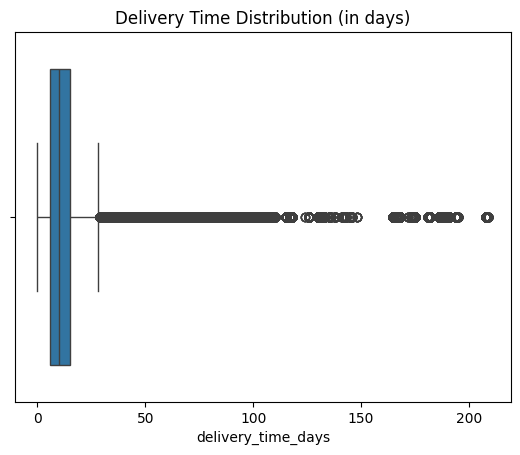

Outliers in delivery times:
                                  order_id                       customer_id  \
3608      ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
3609      ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
3610      ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
3611      ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
3612      ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
...                                    ...                               ...   
15082954  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
15082955  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
15082956  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
15082957  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
15082958  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

         or

In [14]:
# Plot distribusi waktu pengiriman
sns.boxplot(x=orders_geo['delivery_time_days'])
plt.title("Delivery Time Distribution (in days)")
plt.show()

# Identifikasi outlier (menggunakan IQR)
Q1 = orders_geo['delivery_time_days'].quantile(0.25)
Q3 = orders_geo['delivery_time_days'].quantile(0.75)
IQR = Q3 - Q1

# Outlier: data di luar (Q1 - 1.5*IQR) dan (Q3 + 1.5*IQR)
outliers = orders_geo[
    (orders_geo['delivery_time_days'] < (Q1 - 1.5 * IQR)) |
    (orders_geo['delivery_time_days'] > (Q3 + 1.5 * IQR))
]

print("Outliers in delivery times:")
print(outliers)


**Insight:**
- xxx
- xxx

### Cleaning Data

**1. Orders Geo**

In [15]:
# Cek kolom dengan missing value
print("Missing values before handling:")
print(orders_geo.isnull().sum())

# Penanganan missing value (contoh):
# Menghapus baris dengan missing value di kolom kritis
orders_geo = orders_geo.dropna(subset=['order_purchase_timestamp', 'order_delivered_customer_date'])

# Mengisi missing value untuk kolom lokasi dengan "Unknown" (jika diperlukan)
orders_geo['geolocation_city'] = orders_geo['geolocation_city'].fillna('Unknown')

# Mengisi missing value pada kolom tanggal estimasi pengiriman dengan rata-rata
orders_geo['order_estimated_delivery_date'] = orders_geo['order_estimated_delivery_date'].fillna(
    orders_geo['order_estimated_delivery_date'].mean()
)

# Cek ulang setelah penanganan
print("\nMissing values after handling:")
print(orders_geo.isnull().sum())

Missing values before handling:
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                 25155
order_delivered_carrier_date     271651
order_delivered_customer_date    429491
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
geolocation_zip_code_prefix         278
geolocation_lat                     278
geolocation_lng                     278
geolocation_city                    278
geolocation_state                   278
delivery_time_days               429491
dtype: int64

Missing values after handling:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                2634
order_deliver

In [17]:
# Menghapus baris dengan tanggal pengiriman lebih awal dari tanggal pembelian
orders_geo = orders_geo[orders_geo['order_delivered_customer_date'] >= orders_geo['order_purchase_timestamp']]

print("Data after handling invalid values:")
print(orders_geo.info())


Data after handling invalid values:
<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 15083588
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
 8   customer_unique_id             96476 non-null  object        
 9   customer_zip_code_prefix       96476 non-null  int64         
 10  customer_city                  96476 non-null  o

In [16]:
# Menghapus baris duplikat secara keseluruhan
orders_geo = orders_geo.drop_duplicates()

# Menghapus duplikasi berdasarkan order_id, menjaga baris pertama
orders_geo = orders_geo.drop_duplicates(subset='order_id', keep='first')

print("Data after handling duplicates:")
print(orders_geo.info())


Data after handling duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 15083588
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
 8   customer_unique_id             96476 non-null  object        
 9   customer_zip_code_prefix       96476 non-null  int64         
 10  customer_city                  96476 non-null  objec

In [18]:
# Menghapus baris dengan waktu pengiriman negatif
orders_geo = orders_geo[orders_geo['delivery_time_days'] >= 0]

print("Data after handling inconsistent values:")
print(orders_geo.describe())


Data after handling inconsistent values:
            order_purchase_timestamp              order_approved_at  \
count                          96476                          96462   
mean   2018-01-01 22:44:47.156474368  2018-01-02 10:08:41.350552576   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%              2017-09-14 08:10:58            2017-09-14 14:30:16   
50%              2018-01-20 19:21:46            2018-01-22 13:48:57   
75%    2018-05-05 18:28:21.750000128  2018-05-06 10:30:44.750000128   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          96475                          96476   
mean   2018-01-05 04:14:08.754413056  2018-01-14 12:09:19.035542784   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-18 16:21:0

In [19]:
# Menghitung IQR untuk waktu pengiriman
Q1 = orders_geo['delivery_time_days'].quantile(0.25)
Q3 = orders_geo['delivery_time_days'].quantile(0.75)
IQR = Q3 - Q1

# Batas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan batas
orders_geo['delivery_time_days'] = orders_geo['delivery_time_days'].clip(lower=lower_bound, upper=upper_bound)

# Atau, menghapus outlier
orders_geo = orders_geo[
    (orders_geo['delivery_time_days'] >= lower_bound) &
    (orders_geo['delivery_time_days'] <= upper_bound)
]

print("Data after handling outliers:")
print(orders_geo.describe())


Data after handling outliers:
            order_purchase_timestamp              order_approved_at  \
count                          96476                          96462   
mean   2018-01-01 22:44:47.156474368  2018-01-02 10:08:41.350552576   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%              2017-09-14 08:10:58            2017-09-14 14:30:16   
50%              2018-01-20 19:21:46            2018-01-22 13:48:57   
75%    2018-05-05 18:28:21.750000128  2018-05-06 10:30:44.750000128   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          96475                          96476   
mean   2018-01-05 04:14:08.754413056  2018-01-14 12:09:19.035542784   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-18 16:21:06  2017-09-

In [20]:
# Simpan dataset yang telah dibersihkan
orders_geo.to_csv('orders_geo_cleaned.csv', index=False)

print("Cleaned dataset saved as 'orders_geo_cleaned.csv'.")

Cleaned dataset saved as 'orders_geo_cleaned.csv'.


**2. Customer Spending 2017**

In [26]:
print(customer_spending_2017.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50864 entries, 0 to 112646
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       50864 non-null  object        
 1   customer_id                    50864 non-null  object        
 2   order_status                   50864 non-null  object        
 3   order_purchase_timestamp       50864 non-null  datetime64[ns]
 4   order_approved_at              50849 non-null  object        
 5   order_delivered_carrier_date   50121 non-null  object        
 6   order_delivered_customer_date  49554 non-null  object        
 7   order_estimated_delivery_date  50864 non-null  object        
 8   order_item_id                  50864 non-null  int64         
 9   product_id                     50864 non-null  object        
 10  seller_id                      50864 non-null  object        
 11  shipping_limit_date

In [27]:
# Menghitung jumlah missing value per kolom
missing_values = customer_spending_2017.isnull().sum()

# Menampilkan kolom dengan missing value
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
order_approved_at                  15
order_delivered_carrier_date      743
order_delivered_customer_date    1310
dtype: int64


In [29]:
# Deteksi nilai negatif di total_spending
invalid_spending = customer_spending_2017[customer_spending_2017['total_spending'] < 0]
print("Invalid total spending (negative values):")
print(invalid_spending)

# Deteksi nilai negatif atau nol di purchase_frequency
invalid_frequency = customer_spending_2017[customer_spending_2017['purchase_frequency'] <= 0]
print("Invalid purchase frequency (negative or zero):")
print(invalid_frequency)


KeyError: 'purchase_frequency'

In [30]:
# Deteksi baris duplikat
duplicate_rows = customer_spending_2017[customer_spending_2017.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

# Deteksi duplikasi berdasarkan customer_id
duplicate_customers = customer_spending_2017[customer_spending_2017.duplicated(subset='customer_id', keep=False)]
print("Duplicate customer IDs:")
print(duplicate_customers)


Duplicate rows:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []
Duplicate customer IDs:
                                order_id                       customer_id  \
10      e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11      e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
83      82bce245b1c9148f8d19a55b9ff70644  388025bec8128ff20ec1a316ed4dcf02   
84      82bce245b1c9148f8d19a55b9ff70644  388025bec8128ff20ec1a316ed4dcf02   
85      82bce245b1c9148f8d19a55b9ff70644  388025bec8128ff20ec1a316ed4dcf02   
...                                  ...                               ...   
112573  dbd4cbb492a12b99c5224014930acc18  a14f

In [31]:
# Cek konsistensi satuan untuk total_spending (tidak ada nilai negatif atau terlalu besar)
print("Summary of total_spending:")
print(customer_spending_2017['total_spending'].describe())

# Cek konsistensi satuan untuk purchase_frequency
print("Summary of purchase_frequency:")
print(customer_spending_2017['purchase_frequency'].describe())


Summary of total_spending:


KeyError: 'total_spending'

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metode IQR untuk deteksi outlier
for column in ['total_spending', 'purchase_frequency']:
    Q1 = customer_spending_2017[column].quantile(0.25)
    Q3 = customer_spending_2017[column].quantile(0.75)
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outlier
    outliers = customer_spending_2017[
        (customer_spending_2017[column] < lower_bound) |
        (customer_spending_2017[column] > upper_bound)
    ]

    print(f"Outliers in {column}:")
    print(outliers)

    # Visualisasi distribusi
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=customer_spending_2017[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


KeyError: 'total_spending'

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
# Tambahkan kolom delivery_time_days (selisih dalam hari)
orders_geo['delivery_time_days'] = (
    orders_geo['order_delivered_customer_date'] - orders_geo['order_purchase_timestamp']
).dt.days

# Filter data hanya untuk tahun 2017
orders_geo_2017 = orders_geo[
    orders_geo['order_purchase_timestamp'].dt.year == 2017
]

print("Dataset filtered for 2017:")
print(orders_geo_2017.info())


Dataset filtered for 2017:
<class 'pandas.core.frame.DataFrame'>
Index: 43426 entries, 0 to 15083531
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       43426 non-null  object        
 1   customer_id                    43426 non-null  object        
 2   order_status                   43426 non-null  object        
 3   order_purchase_timestamp       43426 non-null  datetime64[ns]
 4   order_approved_at              43412 non-null  datetime64[ns]
 5   order_delivered_carrier_date   43425 non-null  datetime64[ns]
 6   order_delivered_customer_date  43426 non-null  datetime64[ns]
 7   order_estimated_delivery_date  43426 non-null  datetime64[ns]
 8   customer_unique_id             43426 non-null  object        
 9   customer_zip_code_prefix       43426 non-null  int64         
 10  customer_city                  43426 non-null  object    

In [22]:
# Hitung rata-rata waktu pengiriman per kota
city_delivery_time = orders_geo_2017.groupby('customer_city')['delivery_time_days'].mean().reset_index()

# Ubah nama kolom agar lebih jelas
city_delivery_time.columns = ['customer_city', 'avg_delivery_time_days']

# Tampilkan 10 kota dengan rata-rata waktu pengiriman tertinggi
city_delivery_time_sorted = city_delivery_time.sort_values(by='avg_delivery_time_days', ascending=False)
print("Top 10 cities with highest average delivery time:")
print(city_delivery_time_sorted.head(10))


Top 10 cities with highest average delivery time:
            customer_city  avg_delivery_time_days
18      adhemar de barros                    97.0
2228             perdizes                    95.0
1825        miguel calmon                    85.0
787    conceicao da feira                    83.0
2424             quintana                    79.0
2659             santaluz                    75.0
1228             humildes                    71.0
2595  santa cruz de goias                    67.0
1709           machadinho                    65.0
1801      matoes do norte                    65.0


In [23]:
# Filter kota dengan waktu pengiriman rata-rata lebih dari 10 hari
cities_above_10_days = city_delivery_time[city_delivery_time['avg_delivery_time_days'] > 10]

print("Cities with average delivery time > 10 days:")
print(cities_above_10_days)


Cities with average delivery time > 10 days:
      customer_city  avg_delivery_time_days
2        abaetetuba               28.000000
3           abaiara               25.000000
4             abare               15.000000
5            abatia               18.500000
6     abdon batista               14.000000
...             ...                     ...
3242       xinguara               20.250000
3243    xique-xique               15.000000
3244       zacarias               14.500000
3245        ze doca               30.666667
3246         zortea               12.000000

[2557 rows x 2 columns]


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

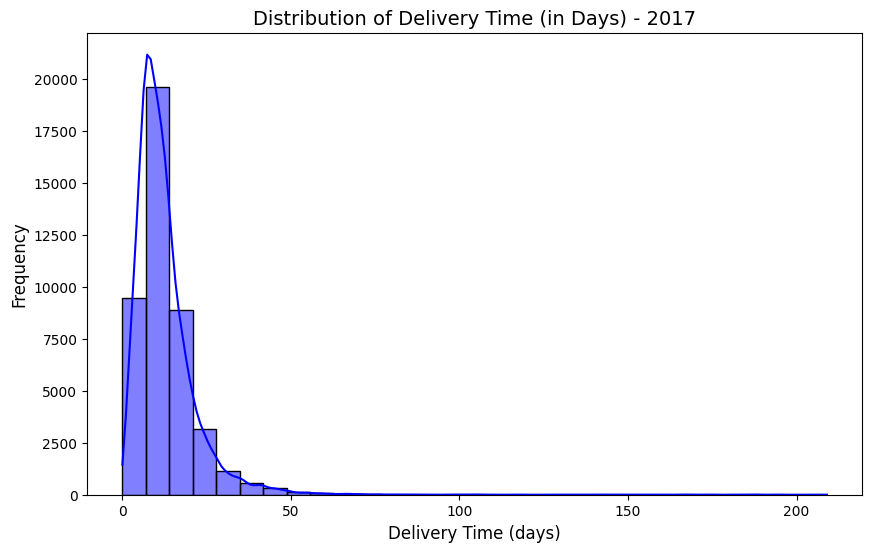

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi waktu pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(orders_geo_2017['delivery_time_days'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Time (in Days) - 2017", fontsize=14)
plt.xlabel("Delivery Time (days)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


<ipython-input-25-43e3b13971fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_city', y='avg_delivery_time_days', palette='viridis')


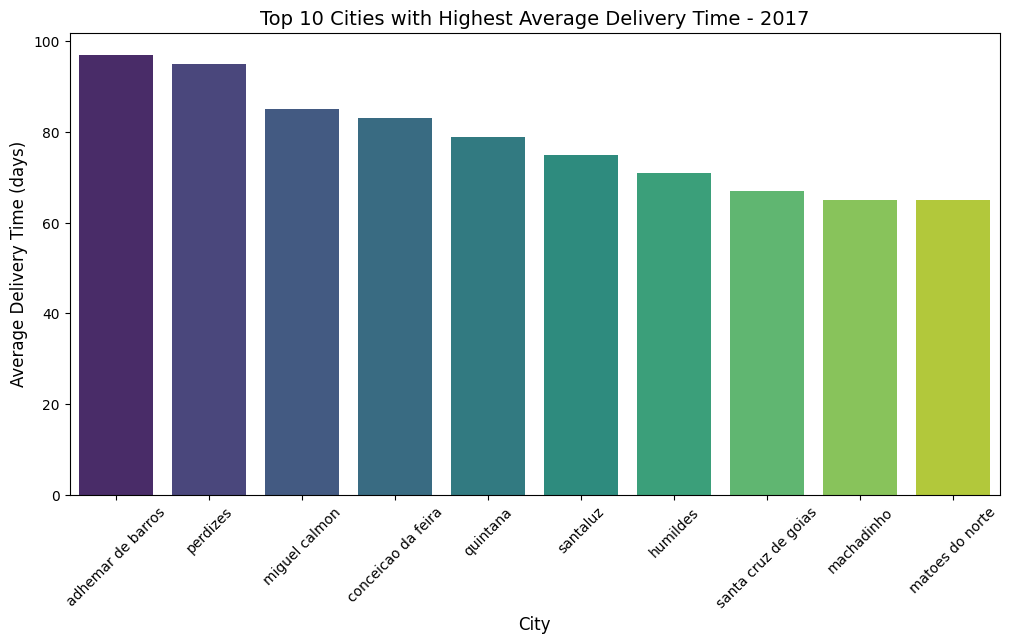

In [25]:
# Visualisasi 10 kota dengan waktu pengiriman tertinggi
top_cities = city_delivery_time_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='customer_city', y='avg_delivery_time_days', palette='viridis')
plt.title("Top 10 Cities with Highest Average Delivery Time - 2017", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Delivery Time (days)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2